<a href="https://colab.research.google.com/github/Rwaan-001/projectRepo/blob/main/data_science_UPDATED_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 2: Part 5-8**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_1samp, skew, kurtosis

In [ ]:
DATA_PATH = "/content/shopping_behavior_updatedNEW.csv"
df = pd.read_csv(DATA_PATH)

TARGET = "Purchase Amount (USD)"
NUM_IV = "Age"                 # numerical IV for Pearson/Spearman
CAT_IV = "Discount Applied"    # categorical IV for Chi-square

df = df.copy()
if df[TARGET].isna().any():
    df = df.dropna(subset=[TARGET])  # drop rows missing the target

display(df.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
print("Unique values in 'Category' column:")
print(df['Category'].unique())

Unique values in 'Category' column:
['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [ ]:
#(TASK2) Q2:

# Function for descriptive statistics
def descriptive_stats(data, field):
    """Function to calculate descriptive statistics for a given column."""
    s = pd.to_numeric(data[field], errors='coerce').dropna()

    stats = {
        "Count": s.count(),
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
        "Minimum": s.min(),
        "Maximum": s.max(),
        "Range": s.max() - s.min(),
        "Standard Deviation": s.std(),
        "Variance": s.var(),
        "Skewness": s.skew(),
        "Kurtosis": s.kurt(),
        "25th Percentile": s.quantile(0.25),
        "50th Percentile": s.quantile(0.50),
        "75th Percentile": s.quantile(0.75),
        "Interquartile Range": s.quantile(0.75) - s.quantile(0.25)
    }

    return stats

# Example: apply the function to the dependent variable
results = descriptive_stats(df, "Purchase Amount (USD)")
print("Descriptive Statistics for 'Purchase Amount (USD)':\n")
for k, v in results.items():
    print(f"{k}: {v:.2f}" if isinstance(v, (int, float, np.floating)) else f"{k}: {v}")

Descriptive Statistics for 'Purchase Amount (USD)':

Count: 30
Mean: 59.30
Median: 54.50
Mode: 33
Minimum: 25.00
Maximum: 98.00
Range: 73.00
Standard Deviation: 24.20
Variance: 585.60
Skewness: 0.29
Kurtosis: -1.28
25th Percentile: 40.00
50th Percentile: 54.50
75th Percentile: 84.75
Interquartile Range: 44.75


In [ ]:
# (TASK 2) Q3: sample 150 rows and apply the function from Q2
import pandas as pd

from pathlib import Path
csv_path = Path("/content/shopping_behavior_updatedNEW.csv") # used the original file that has big data since question asked for 150 as sample size

# 1) Load data
df = pd.read_csv(csv_path)

# 2) Choose dependent variable (change if needed)
dep_var = "Purchase Amount (USD)"

# 3) Take a random sample of size 150 (reproducible)
# Check if sample size is larger than the population
sample_size = 150
if sample_size > len(df):
    print(f"Warning: Sample size ({sample_size}) is larger than the total number of rows ({len(df)}). Sampling the entire dataset.")
    sample_size = len(df)

sample_150 = df.sample(n=sample_size, replace=False, random_state=42)


print(f"Original rows: {len(df)}")
print(f"Sample rows:   {len(sample_150)}")

# 4) Apply the Task-2 function to the SAMPLE (not the full df)
from math import isnan  # optional, if you want to check mode
# Re-define the descriptive_stats function if it's not available in the current session
def descriptive_stats(data, field):
    """Function to calculate descriptive statistics for a given column."""
    s = pd.to_numeric(data[field], errors='coerce').dropna()

    stats = {
        "Count": s.count(),
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
        "Minimum": s.min(),
        "Maximum": s.max(),
        "Range": s.max() - s.min(),
        "Standard Deviation": s.std(),
        "Variance": s.var(),
        "Skewness": s.skew(),
        "Kurtosis": s.kurt(),
        "25th Percentile": s.quantile(0.25),
        "50th Percentile": s.quantile(0.50),
        "75th Percentile": s.quantile(0.75),
        "Interquartile Range": s.quantile(0.75) - s.quantile(0.25)
    }

    return stats

stats_150 = descriptive_stats(sample_150, dep_var)

# 5) Show results
print(f"\nDescriptive statistics for SAMPLE (n={sample_size}) — '{dep_var}':")
for k, v in stats_150.items():
    print(f"{k}: {v}")

Original rows: 3900
Sample rows:   150

Descriptive statistics for SAMPLE (n=150) — 'Purchase Amount (USD)':
Count: 150
Mean: 58.36
Median: 58.0
Mode: 36
Minimum: 20
Maximum: 100
Range: 80
Standard Deviation: 23.601069251172877
Variance: 557.0104697986578
Skewness: 0.12105847268407419
Kurtosis: -1.2570664571496384
25th Percentile: 36.25
50th Percentile: 58.0
75th Percentile: 77.0
Interquartile Range: 40.75


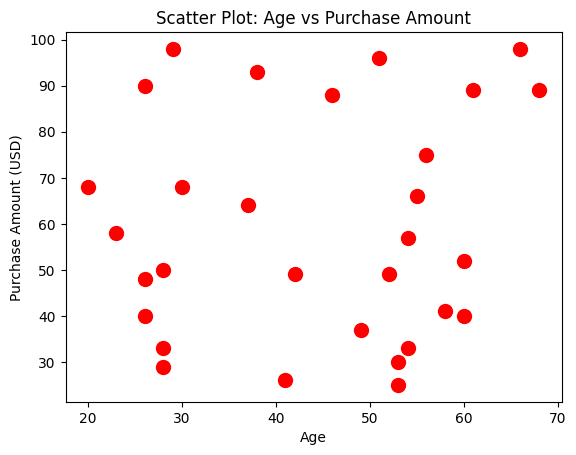

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data into a pandas dataframe
df = pd.read_csv('shopping_behavior_updated1.csv') # used a updated sample size of 30 rows as a short cleaned data

# create a scatter plot for Age Vs Purchase Amount
df.plot.scatter(x='Age', y='Purchase Amount (USD)', s=100, c='red')

# add labels and title
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Scatter Plot: Age vs Purchase Amount')

# display the plot
plt.show()

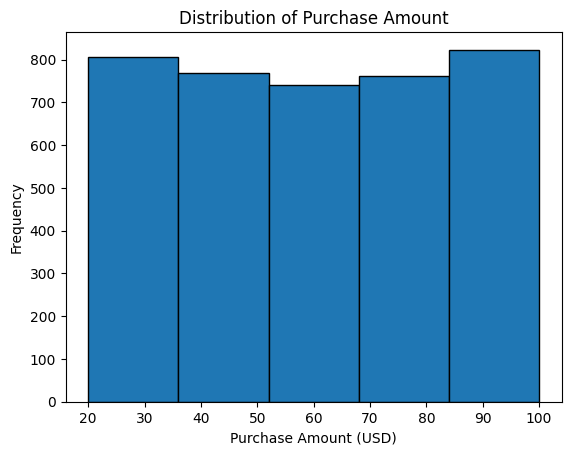

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data into a pandas dataframe
df = pd.read_csv('shopping_behavior_updatedNEW.csv')

# create a histogram for Purchase Amount
plt.hist(df['Purchase Amount (USD)'], bins=5, edgecolor='black')

# add labels and title
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')

# display the plot
plt.show()


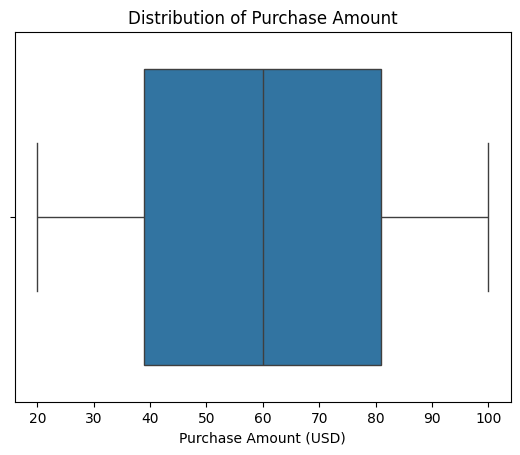

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the data into a pandas dataframe
df = pd.read_csv('shopping_behavior_updatedNEW.csv')

# create a box plot
sns.boxplot(x=df['Purchase Amount (USD)'])

# add labels and title
plt.xlabel('Purchase Amount (USD)')
plt.title('Distribution of Purchase Amount')

# display the plot
plt.show()


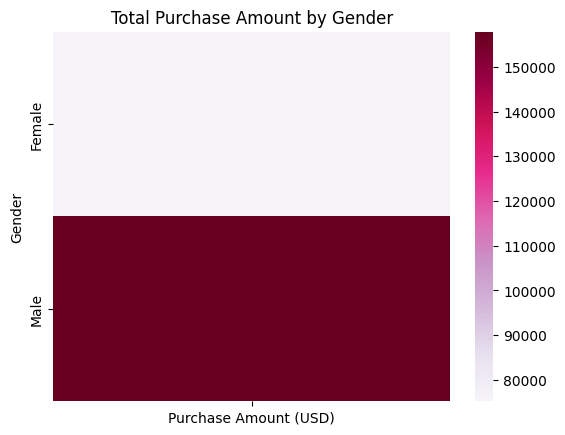

In [ ]:
# libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('/content/shopping_behavior_updatedNEW.csv')

# create a pivot table for the heat map
# Example: show total Purchase Amount by Gender
pivot_table = pd.pivot_table(df, index='Gender', values='Purchase Amount (USD)', aggfunc='sum')

# create the heat map (no text annotations)
sns.heatmap(pivot_table, cmap='PuRd', annot=False)

# add labels and title
plt.ylabel('Gender')
plt.title('Total Purchase Amount by Gender')

# display the plot
plt.show()

In [ ]:
#TASK 2: Q8
#(Asses the performance of the dependent variable to know whether the sample is representative of the normal population by one-sample t-test)



import pandas as pd
from scipy.stats import ttest_1samp

# Load the dataset
df = pd.read_csv('shopping_behavior_updatedNEW.csv')

# dependent variable
data = df['Purchase Amount (USD)'].dropna()

# Population mean (hypothesized)
population_mean = 50

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data, population_mean, nan_policy='omit')

# Display results
print("One-Sample T-Test Results:\n")
print(f"Sample Size = {len(data)}")
print(f"Sample Mean = {data.mean():.2f}")
print(f"Population Mean = {population_mean}")
print(f"t-value = {t_stat:.2f}")
print(f"p-value = {p_value:.3f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("\nResult: The sample mean IS significantly different from the population mean (Reject H0).")
else:
    print("\nResult: The sample mean is NOT significantly different from the population mean (Fail to reject H0).")

One-Sample T-Test Results:

Sample Size = 3900
Sample Mean = 59.76
Population Mean = 50
t-value = 25.75
p-value = 0.000

Result: The sample mean IS significantly different from the population mean (Reject H0).


Model Accuracy: 0.5


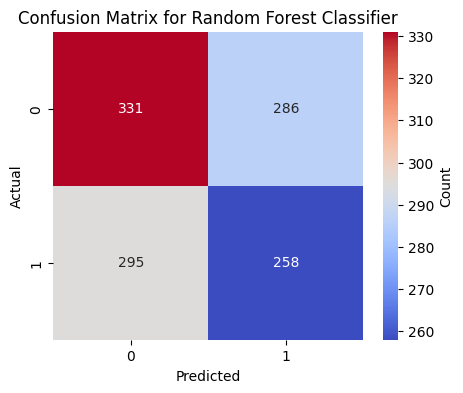

In [ ]:
# Load the CSV file
file_path = 'shopping_behavior_updatedNEW.csv'
data = pd.read_csv(file_path)

# Encode categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label.fit_transform(data[col])

# Prepare data for training
X = data.drop('Purchase Amount (USD)', axis=1)
y = (data['Purchase Amount (USD)'] > data['Purchase Amount (USD)'].median()).astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy, 2))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

(TASK 2) Q5: create a detailed descripitve statitsics report about the dependent variable of the chosen dataset.

> Add blockquote



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Choose dependent variable (edit if yours is different)
dep_var = "Purchase Amount (USD)"

In [ ]:
# Choose dependent variable (edit if yours is different)
dep_var = "Purchase Amount (USD)"

desc = df[dep_var].describe()
extra = {
    "variance": df[dep_var].var(ddof=1),
    "skewness": df[dep_var].skew(),
    "kurtosis": df[dep_var].kurt()
}
print("Descriptive Statistics for", dep_var)
print(desc)
print(extra)

Descriptive Statistics for Purchase Amount (USD)
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64
{'variance': 560.9978060778241, 'skewness': np.float64(0.012701757626433795), 'kurtosis': np.float64(-1.236593691266159)}


(TASK 2) Q6: visulaize the dependent variable by the graph/chart of the following using python program:

A. Scatter Plot

B. Box Plot

C. Histogram

D. Heat Map

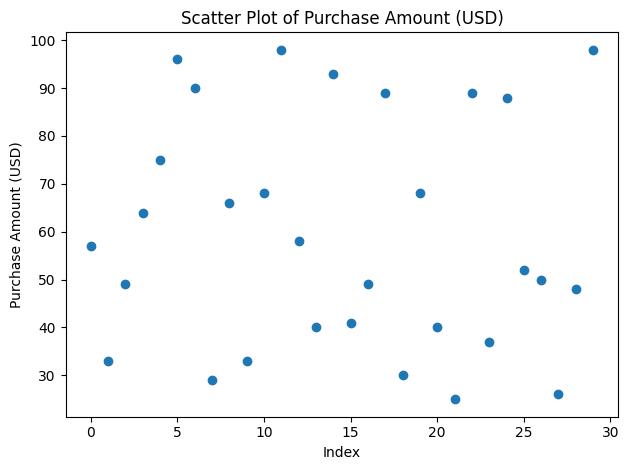

In [ ]:

# load the data
df = pd.read_csv('/content/shopping_behavior_updated1.csv') #data size = 30
#Scatter plot:
plt.figure()
plt.scatter(df.index, df[dep_var])
plt.title(f"Scatter Plot of {dep_var}")
plt.xlabel("Index")
plt.ylabel(dep_var)
plt.tight_layout()
plt.show()


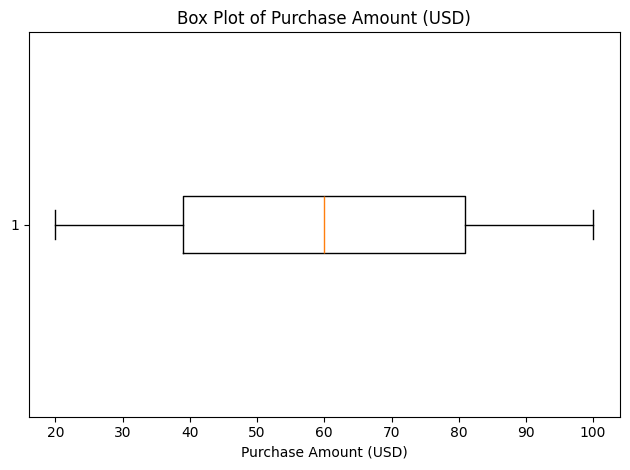

In [ ]:
# load the data
df = pd.read_csv('/content/shopping_behavior_updatedNEW.csv') #data size = 1000

#Box plot
plt.figure()
plt.boxplot(df[dep_var].dropna(), vert=False)
plt.title(f"Box Plot of {dep_var}")
plt.xlabel(dep_var)
plt.tight_layout()
plt.show()


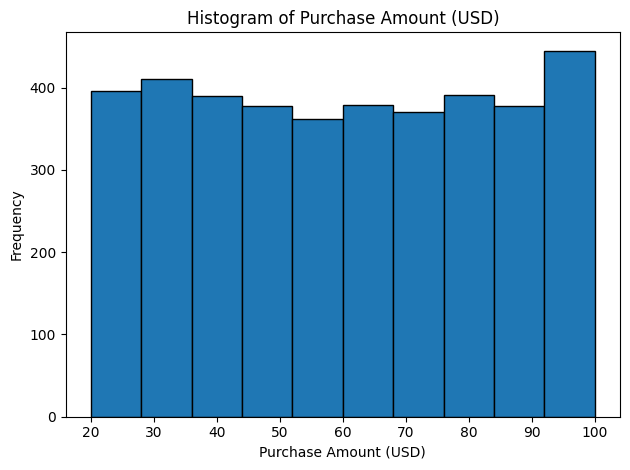

In [ ]:
# load the data
df = pd.read_csv('/content/shopping_behavior_updatedNEW.csv') #data size = 1000
#Histogram:
plt.figure()
plt.hist(df[dep_var].dropna(), bins=10, edgecolor='black')
plt.title(f"Histogram of {dep_var}")
plt.xlabel(dep_var)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


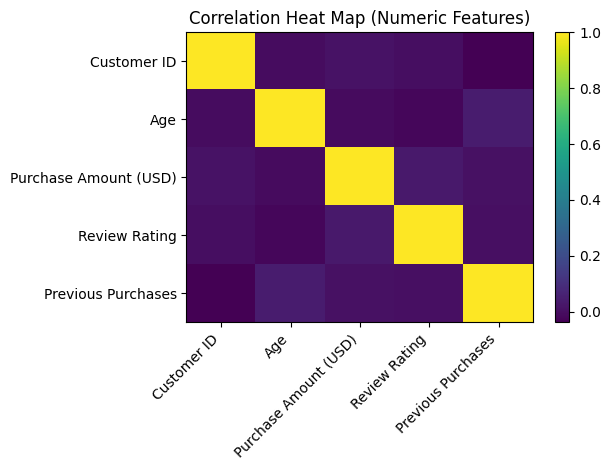

In [ ]:
#Heat Map:
num = df.select_dtypes(include=[np.number])
corr = num.corr(numeric_only=True)

plt.figure()
im = plt.imshow(corr, aspect='auto')
plt.title("Correlation Heat Map (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(im)
plt.tight_layout()
plt.show()


(TASK 2) Q8: Assess the performance of the dependent variable to know wether the sample is representative of the normal population by one-sample t-test.

In [ ]:
POP_MEAN = 50
x = df[dep_var].dropna()

t_stat, p_val = stats.ttest_1samp(x, POP_MEAN)
print(f"One-Sample t-Test on {dep_var} vs mean={POP_MEAN}")
print("t-statistic:", t_stat)
print("p-value:", p_val)

alpha = 0.05
print("Decision:", "Reject H0" if p_val < alpha else "Fail to reject H0")


One-Sample t-Test on Purchase Amount (USD) vs mean=50
t-statistic: 25.74515195046507
p-value: 3.9765103960890893e-135
Decision: Reject H0


(TASK 3) Q12: NOT UPDATES (OLD VERSION)


In [ ]:
# Step 12: Evaluate Models using Confusion Matrix and Accuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Added import for pandas

# Load the dataset if not already loaded in this cell
try:
    df # Check if df exists
except NameError:
    df = pd.read_csv('shopping_behavior_updatedNEW.csv')

# Encode all categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


# Define features (X) and dependent variable (y)
X = df[['Age', 'Gender', 'Previous Purchases', 'Review Rating']]
y = df['Subscription Status']  # Dependent variable (0 or 1)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))


=== Logistic Regression ===
Confusion Matrix:
 [[834   0]
 [336   0]]
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       834
           1       0.00      0.00      0.00       336

    accuracy                           0.71      1170
   macro avg       0.36      0.50      0.42      1170
weighted avg       0.51      0.71      0.59      1170


=== Decision Tree ===
Confusion Matrix:
 [[634 200]
 [208 128]]
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       834
           1       0.39      0.38      0.39       336

    accuracy                           0.65      1170
   macro avg       0.57      0.57      0.57      1170
weighted avg       0.65      0.65      0.65      1170



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Random Forest ===
Confusion Matrix:
 [[675 159]
 [234 102]]
Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       834
           1       0.39      0.30      0.34       336

    accuracy                           0.66      1170
   macro avg       0.57      0.56      0.56      1170
weighted avg       0.64      0.66      0.65      1170



updated:
**(TASK 3) Q12:**

 Evaluate Models using Confusion Matrix and Accuracy


Logistic Regression
Accuracy: 0.4897


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


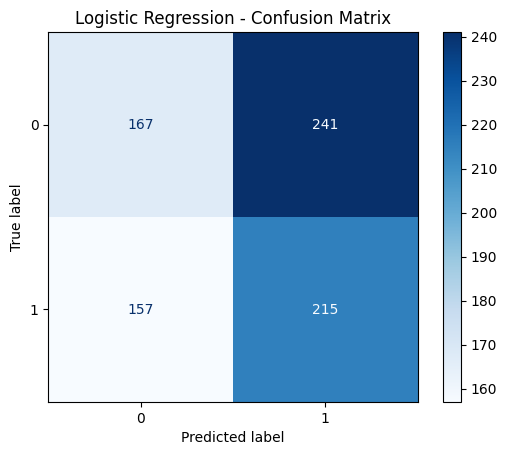


Decision Tree
Accuracy: 0.4846


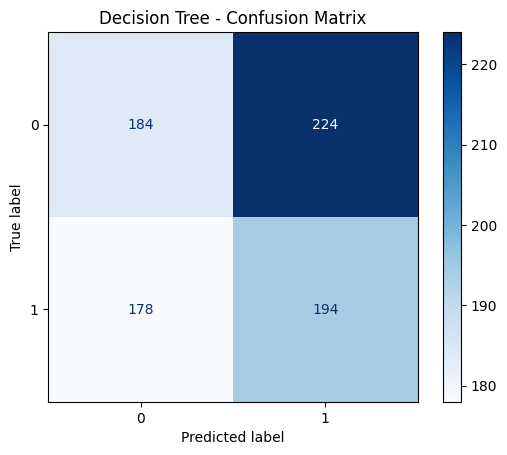


Random Forest
Accuracy: 0.4872


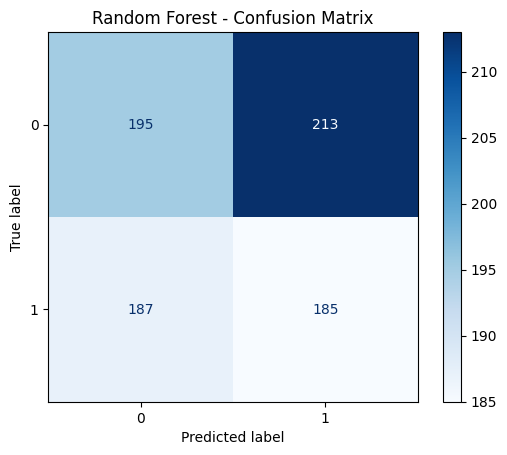


KNN
Accuracy: 0.5


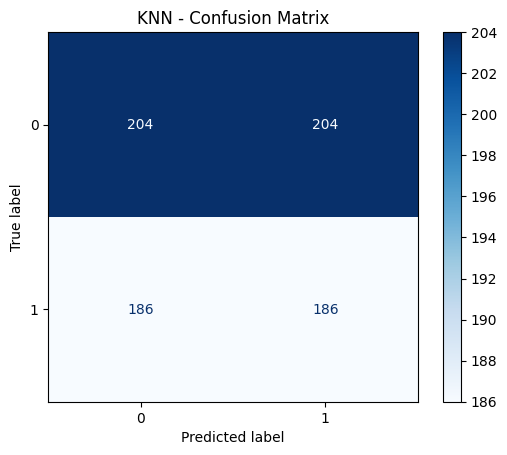


Best Classifier: KNN
Accuracy: 0.5


In [ ]:
# Step 12: Evaluate Models using Confusion Matrix and Accuracy

# Evaluate models using confusion matrix & accuracy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("shopping_behavior_updatedNEW.csv")

# 2. Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# 3. Define features (X) and target (y)
# Change the target column name if different in your dataset
target_column = 'Purchase Amount (USD)' # Assuming 'Purchase Amount (USD)' is the target based on previous cells
X = df.drop(columns=[target_column])

# Convert 'Purchase Amount (USD)' into a binary target variable based on the median
median_purchase = df[target_column].median()
y = (df[target_column] >= median_purchase).astype(int) # 1 for high purchase, 0 for low purchase


# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 6. Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# 7. Identify and display the best model
best_model = max(results, key=results.get)
print("\nBest Classifier:", best_model)
print("Accuracy:", round(results[best_model], 4))

# **(TASK 3) Q13:**

In [ ]:
#Step 13: Predict using Best-Fit Model (Random Forest)

from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

#Predict on test data
y_pred = best_model.predict(X_test)

#Display sample predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(predictions.head(10))



Sample Predictions:
      Actual  Predicted
839        0          1
1717       0          0
321        0          1
3187       1          0
2269       0          1
366        0          0
2644       1          1
1749       1          0
3605       0          1
1096       0          1



# **(TASK3) Q14:**

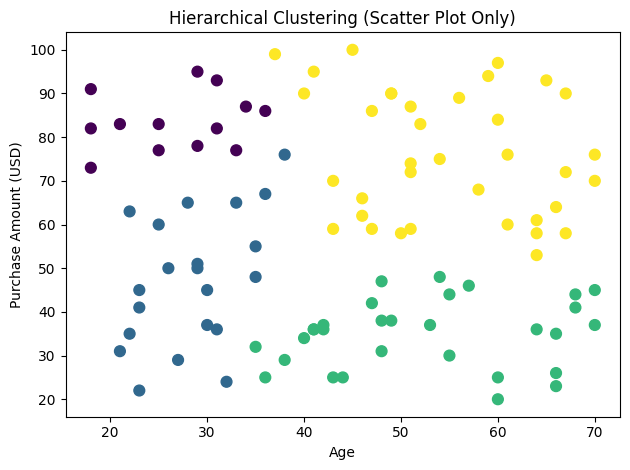

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("/content/shopping_behavior_100 copy.csv")

# Select only Age and Purchase Amount
data = df[["Age", "Purchase Amount (USD)"]].dropna()

# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Create linkage for hierarchical clustering
linkage_matrix = sch.linkage(X, method="ward")

# Cut the dendrogram into 4 clusters (you can change k)
clusters = sch.fcluster(linkage_matrix, t=4, criterion='maxclust')

# Scatter plot using ONLY the hierarchical cluster labels
plt.figure()
plt.scatter(
    data["Age"],
    data["Purchase Amount (USD)"],
    c=clusters,
    s=60
)

plt.title("Hierarchical Clustering (Scatter Plot Only)")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()


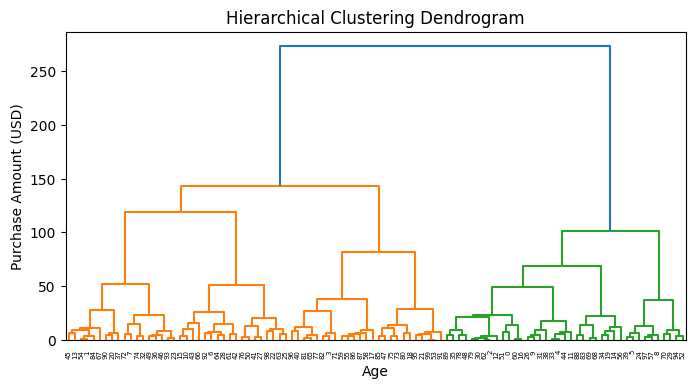

In [16]:
#Hierarchical (Agglomerative) Clustering
import pandas as pd # Import pandas
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("/content/shopping_behavior_100 copy.csv") # Corrected file path


#Select numeric fields
cluster_data = df[['Age', 'Purchase Amount (USD)']].dropna()

linked = linkage(cluster_data, method = 'ward')
plt.figure(figsize=(8, 4))
dendrogram(linked, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

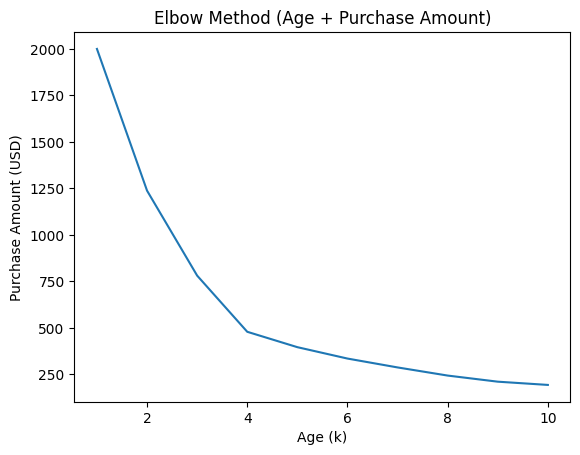

In [5]:
# K-Means clustering on the given dataset (shopping_behavior_updated1.csv)
# Requirement: Perform K-means for fields from the chosen dataset.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1) Load the dataset
df = pd.read_csv("/content/shopping_behavior_100 copy.csv") # Corrected to use the available dataset

# 2) Select numeric fields from THIS dataset
#    We'll cluster customers using their Age and Purchase Amount (USD)
feature_cols = ["Age", "Purchase Amount (USD)"]
data = df[feature_cols].dropna().reset_index(drop=True)

# 3) Scale features for K-Means
scaler = StandardScaler()
X = scaler.fit_transform(data)

# 4) (Optional) Use the Elbow Method to inspect a good k
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10, max_iter=300)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method (Age + Purchase Amount)")
plt.xlabel("Age (k)")
plt.ylabel("Purchase Amount (USD)")
plt.show()

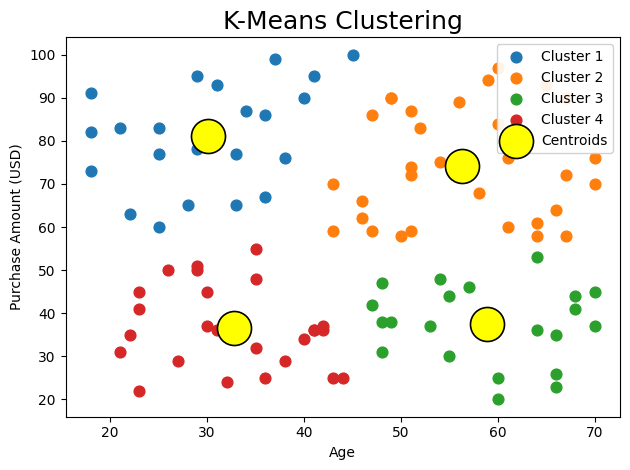

Cluster centroids (original units):
         Age  Purchase Amount (USD)
0  30.130435              81.173913
1  56.290323              74.193548
2  58.857143              37.428571
3  32.720000              36.560000


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv("/content/shopping_behavior_100 copy.csv")


feature_cols = ["Age", "Purchase Amount (USD)"]

data = df[feature_cols].copy()


scaler = StandardScaler()
X = scaler.fit_transform(data)


k = 4
kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    random_state=42,
    n_init=10,
    max_iter=300
)

labels = kmeans.fit_predict(X)


clustered = data.copy()
clustered["Cluster"] = labels

plt.figure()
for c in sorted(clustered["Cluster"].unique()):
    plt.scatter(
        clustered.loc[clustered["Cluster"] == c, "Age"],
        clustered.loc[clustered["Cluster"] == c, "Purchase Amount (USD)"],
        s=60,
        label=f"Cluster {c+1}"
    )


centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=feature_cols
)

plt.scatter(
    centroids_unscaled["Age"],
    centroids_unscaled["Purchase Amount (USD)"],
    s=600,
    c="yellow",
    edgecolors="black",
    linewidths=1.2,
    label="Centroids",
    zorder=5
)

plt.title("K-Means Clustering", fontsize=18)
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.legend(framealpha=0.9, title=None)
plt.tight_layout()
plt.show()

print("Cluster centroids (original units):")
print(centroids_unscaled)
